In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
#import sklearn.metrics import accuracy_score
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

In [3]:
df=pd.read_csv('titanic_train.csv')
df

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S
...,...,...,...,...,...,...,...,...,...,...,...,...
886,887,0,2,"Montvila, Rev. Juozas",male,27.0,0,0,211536,13.0000,NaN,S
887,888,1,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,112053,30.0000,B42,S
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,NaN,1,2,W./C. 6607,23.4500,NaN,S
889,890,1,1,"Behr, Mr. Karl Howell",male,26.0,0,0,111369,30.0000,C148,C


In [4]:
df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [5]:
df.tail()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
886,887,0,2,"Montvila, Rev. Juozas",male,27.0,0,0,211536,13.00,NaN,S
887,888,1,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,112053,30.00,B42,S
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,NaN,1,2,W./C. 6607,23.45,NaN,S
889,890,1,1,"Behr, Mr. Karl Howell",male,26.0,0,0,111369,30.00,C148,C
890,891,0,3,"Dooley, Mr. Patrick",male,32.0,0,0,370376,7.75,NaN,Q


In [6]:
#from above head and tail multiple nan and missing values seen 
df.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

In [7]:
#age have 177 value missing and cabin number have most of the values missing, and 2 is missing in embark (y= survived )
# its categorical data hence we use classifiers 
#We are dropping cabin column as out of 891 687 are missing

In [8]:
df.drop(['Cabin'],axis=1,inplace=True)

In [9]:
df.shape

(891, 11)

In [10]:
# In age column we have Mean of all and update mean in all missing velues
np.mean(df['Age'])
df['Age']=df['Age'].fillna(29.69911764705882)

In [11]:
#All NAN of age is replaced with mean of data
df.isnull().sum()

PassengerId    0
Survived       0
Pclass         0
Name           0
Sex            0
Age            0
SibSp          0
Parch          0
Ticket         0
Fare           0
Embarked       2
dtype: int64

In [12]:
#Embark have only 2 value missing and its categorical data so we will that missing values by most repetative 
#embark have 3 enique values 
df.nunique()

PassengerId    891
Survived         2
Pclass           3
Name           891
Sex              2
Age             89
SibSp            7
Parch            7
Ticket         681
Fare           248
Embarked         3
dtype: int64

In [13]:
# to check repetation we use mode--most repetative valuse is 's' so we repale NAN values with s
df['Embarked'].mode()

0    S
Name: Embarked, dtype: object

In [14]:
#filling null values with s
df['Embarked']=df['Embarked'].fillna('s')

In [15]:
# no nun values are present 
df.isnull().sum()

PassengerId    0
Survived       0
Pclass         0
Name           0
Sex            0
Age            0
SibSp          0
Parch          0
Ticket         0
Fare           0
Embarked       0
dtype: int64

In [16]:
df.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,891.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,13.002015,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,22.000000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,29.699118,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,35.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


In [17]:
# by seening max and 75 its seems that out liers present in data
df.skew()

PassengerId    0.000000
Survived       0.478523
Pclass        -0.630548
Age            0.434488
SibSp          3.695352
Parch          2.749117
Fare           4.787317
dtype: float64

In [18]:
import seaborn as sns
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings('ignore')
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import mean_squared_error
from sklearn.metrics import r2_score
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor
from sklearn.tree import DecisionTreeRegressor
from sklearn.neighbors import KNeighborsRegressor as KNN
from sklearn.linear_model import Lasso,Ridge

In [19]:
#Data is highly skewed in pclass(categorical data so we ignore),SIBSP,Parch @@@ fare(numerical data) and most are right skewed 
#we have to work in numerical data only because its not categorical data
df['Fare']=np.sqrt(df['Fare'])
df['Fare'].skew()
df['Fare']=np.sqrt(df['Fare'])
df['Fare'].skew()



0.519678888206381

In [20]:
#checking our targer varibale for 0 and 1 i.e how many died/survive
df['Survived'].value_counts()

0    549
1    342
Name: Survived, dtype: int64

In [21]:
#342 survivd and 549 not survived

#Visualization of data

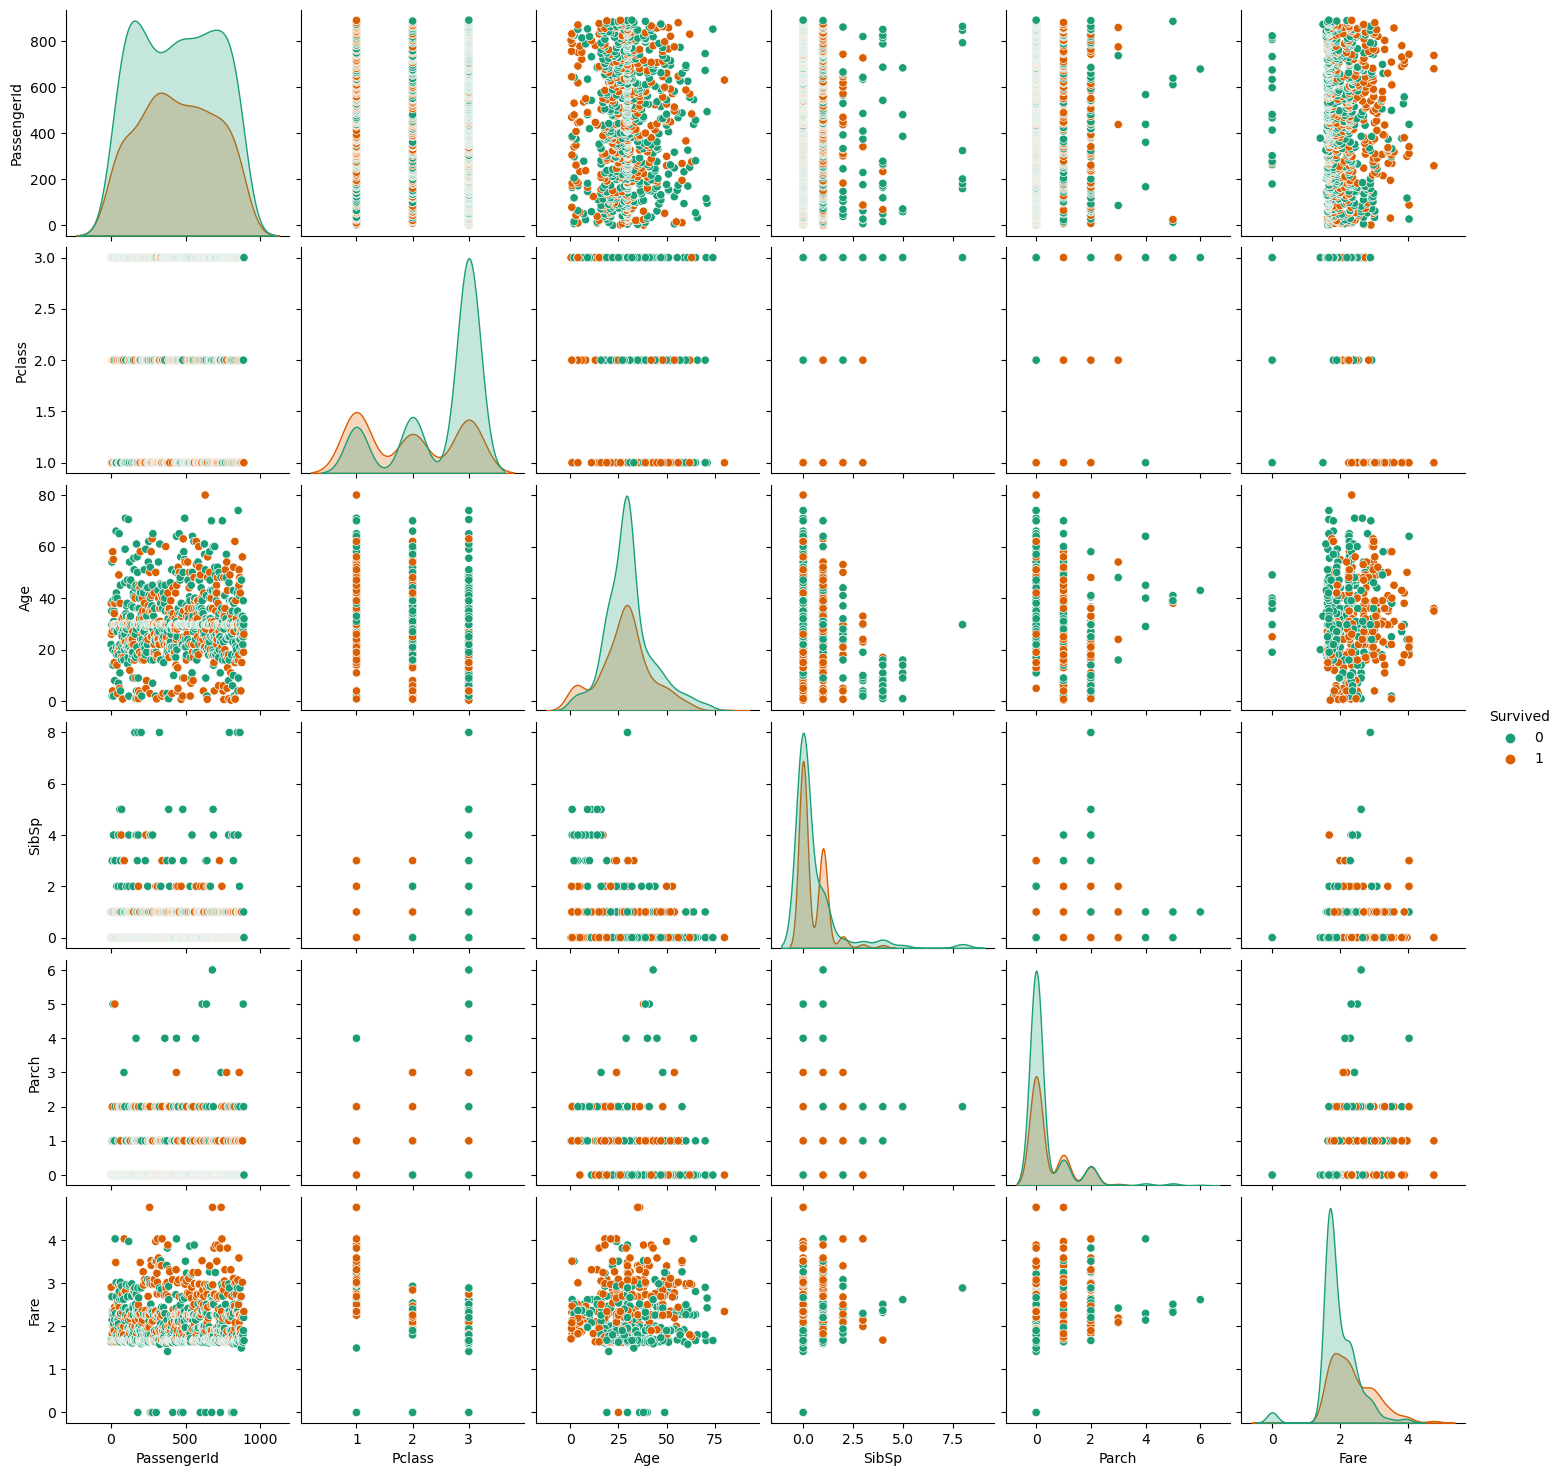

In [22]:
#checking co-relation of target with all variable
sns.pairplot(df,hue='Survived',palette='Dark2')
plt.show()

In [23]:
df.columns

Index(['PassengerId', 'Survived', 'Pclass', 'Name', 'Sex', 'Age', 'SibSp',
       'Parch', 'Ticket', 'Fare', 'Embarked'],
      dtype='object')

male      577
female    314
Name: Sex, dtype: int64


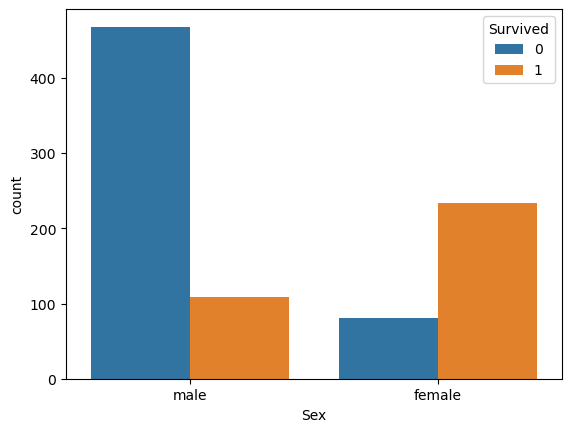

In [24]:
#count plot with gender
ax=sns.countplot(data=df,x='Sex',hue='Survived')
print(df['Sex'].value_counts())

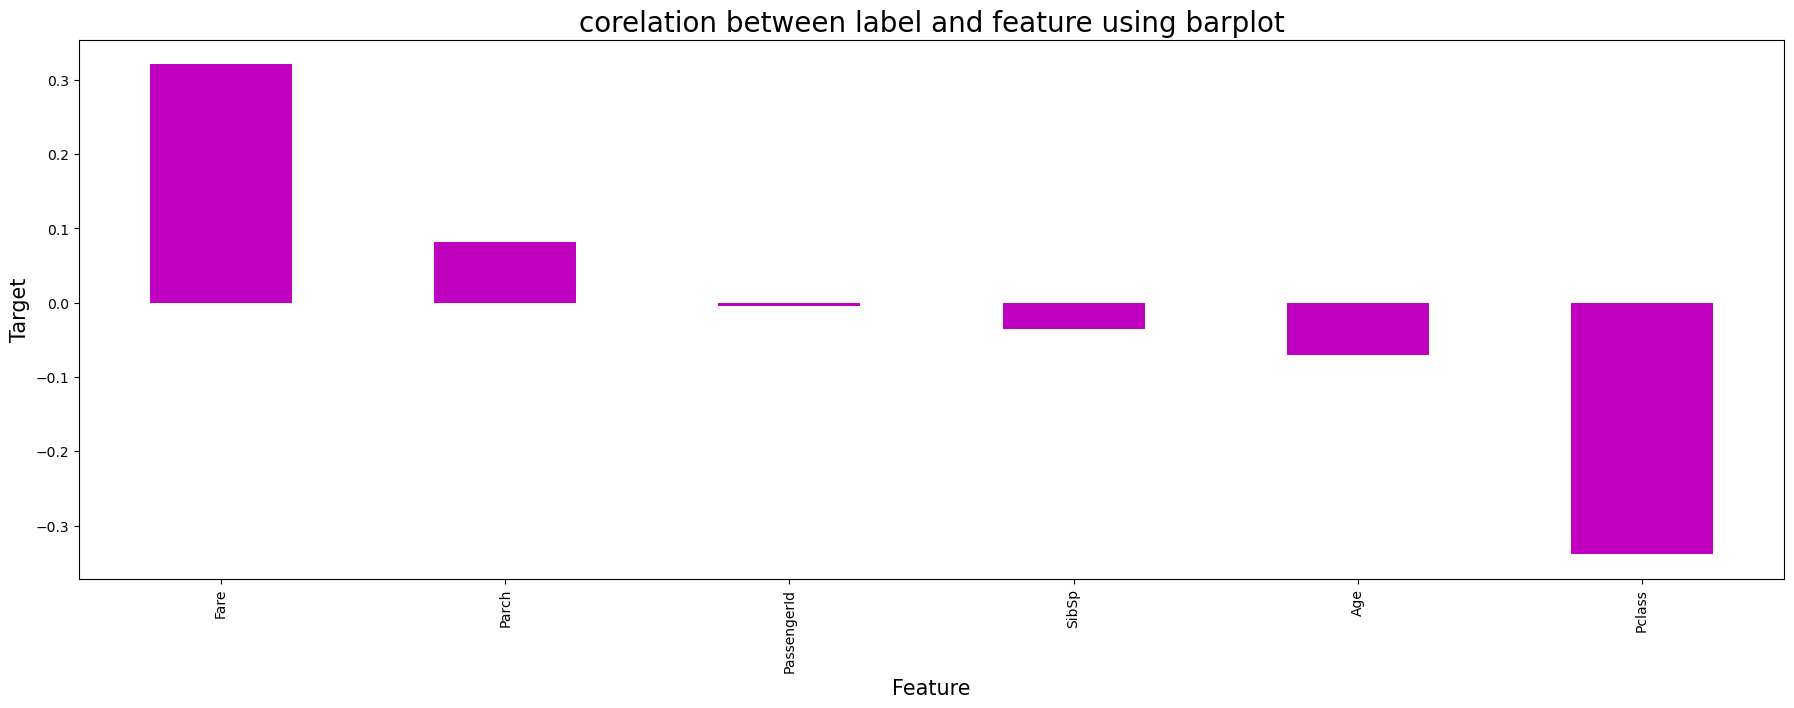

In [25]:
plt.figure(figsize=(22,7))
df.corr()['Survived'].sort_values(ascending=False).drop(['Survived']).plot(kind='bar',color='m')
plt.xlabel('Feature',fontsize=15)
plt.ylabel('Target',fontsize=15)
plt.title('corelation between label and feature using barplot',fontsize=20)
plt.show()

male      577
female    314
Name: Sex, dtype: int64


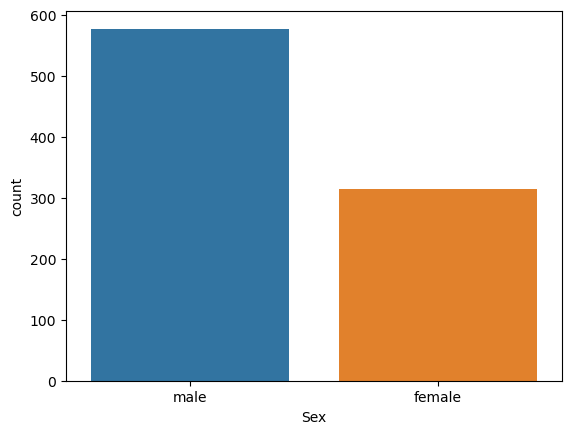

In [26]:
ax=sns.countplot(data=df,x='Sex')
print(df['Sex'].value_counts())

3    491
1    216
2    184
Name: Pclass, dtype: int64


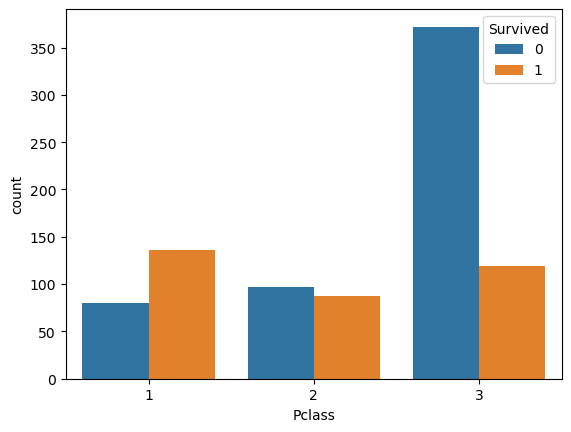

In [27]:
ax=sns.countplot(data=df,x='Pclass',hue='Survived')
print(df['Pclass'].value_counts())

In [28]:
# Now going for ML 
#Changing categorical data into numerical data

In [29]:
from sklearn.preprocessing import OrdinalEncoder
OE=OrdinalEncoder()
for i in df.columns:
    if df[i].dtypes=='object':
        df[i]=OE.fit_transform(df[i].values.reshape(-1,1))

In [30]:
df.shape

(891, 11)

In [31]:
df

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked
0,1,0,3,108.0,1.0,22.000000,1,0,523.0,1.640909,2.0
1,2,1,1,190.0,0.0,38.000000,1,0,596.0,2.905674,0.0
2,3,1,3,353.0,0.0,26.000000,0,0,669.0,1.677837,2.0
3,4,1,1,272.0,0.0,35.000000,1,0,49.0,2.699440,2.0
4,5,0,3,15.0,1.0,35.000000,0,0,472.0,1.684414,2.0
...,...,...,...,...,...,...,...,...,...,...,...
886,887,0,2,548.0,1.0,27.000000,0,0,101.0,1.898829,2.0
887,888,1,1,303.0,0.0,19.000000,0,0,14.0,2.340347,2.0
888,889,0,3,413.0,0.0,29.699118,1,2,675.0,2.200573,2.0
889,890,1,1,81.0,1.0,26.000000,0,0,8.0,2.340347,0.0


In [32]:
# we have no use of Passenger ID,Name and Ticket and they have no corelation with variable do we are dropping all column
x=df.drop(['PassengerId','Survived','Name','Ticket'],axis=1)
y=df['Survived']

In [33]:
x.shape

(891, 7)

In [34]:
y.shape

(891,)

In [48]:
from imblearn.over_sampling import SMOTE
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import ExtraTreesClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn import metrics
from sklearn .metrics import accuracy_score,confusion_matrix,classification_report
from sklearn.metrics import classification_report
from sklearn.metrics import accuracy_score
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import GridSearchCV 
import warnings
warnings.simplefilter("ignore")
from sklearn.ensemble import RandomForestClassifier,ExtraTreesClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.ensemble import GradientBoostingClassifier,AdaBoostClassifier,BaggingClassifier
from sklearn.metrics import classification_report,confusion_matrix,roc_curve,accuracy_score
from sklearn.model_selection import cross_val_score


In [49]:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.3, random_state=30)

In [50]:
## Checking Accuracy for logistic Regression

LR=LogisticRegression()
LR.fit(x_train,y_train)
predLR=LR.predict(x_test)
print(accuracy_score(y_test,predLR))
print(confusion_matrix(y_test,predLR))
print(classification_report(y_test,predLR))

0.7910447761194029
[[140  20]
 [ 36  72]]
              precision    recall  f1-score   support

           0       0.80      0.88      0.83       160
           1       0.78      0.67      0.72       108

    accuracy                           0.79       268
   macro avg       0.79      0.77      0.78       268
weighted avg       0.79      0.79      0.79       268



In [51]:
ABC=AdaBoostClassifier()
ABC.fit(x_train,y_train)
predABC=ABC.predict(x_test)
print(accuracy_score(y_test,predABC))
print(confusion_matrix(y_test,predABC))
print(classification_report(y_test,predABC))

0.7835820895522388
[[134  26]
 [ 32  76]]
              precision    recall  f1-score   support

           0       0.81      0.84      0.82       160
           1       0.75      0.70      0.72       108

    accuracy                           0.78       268
   macro avg       0.78      0.77      0.77       268
weighted avg       0.78      0.78      0.78       268



In [52]:
#now checking accuracy for ExtraTree Classifier
ET=ExtraTreesClassifier()
ET.fit(x_train,y_train)
predET=ET.predict(x_test)
print(accuracy_score(y_test,predET))
print(confusion_matrix(y_test,predET))
print(classification_report(y_test,predET))

0.7910447761194029
[[138  22]
 [ 34  74]]
              precision    recall  f1-score   support

           0       0.80      0.86      0.83       160
           1       0.77      0.69      0.73       108

    accuracy                           0.79       268
   macro avg       0.79      0.77      0.78       268
weighted avg       0.79      0.79      0.79       268



In [53]:
svc=SVC()
svc.fit(x_train,y_train)
pr=svc.predict(x_test)
print(accuracy_score(y_test,pr))
print(confusion_matrix(y_test,pr))
print(classification_report(y_test,pr))


0.6194029850746269
[[157   3]
 [ 99   9]]
              precision    recall  f1-score   support

           0       0.61      0.98      0.75       160
           1       0.75      0.08      0.15       108

    accuracy                           0.62       268
   macro avg       0.68      0.53      0.45       268
weighted avg       0.67      0.62      0.51       268



In [54]:
dtc=DecisionTreeClassifier()
dtc.fit(x_train,y_train)
pr=dtc.predict(x_test)
print(accuracy_score(y_test,pr))
print(confusion_matrix(y_test,pr))
print(classification_report(y_test,pr))



0.7985074626865671
[[134  26]
 [ 28  80]]
              precision    recall  f1-score   support

           0       0.83      0.84      0.83       160
           1       0.75      0.74      0.75       108

    accuracy                           0.80       268
   macro avg       0.79      0.79      0.79       268
weighted avg       0.80      0.80      0.80       268



In [55]:
rfc=RandomForestClassifier()
rfc.fit(x_train,y_train)
pr=rfc.predict(x_test)
print(accuracy_score(y_test,pr))
print(confusion_matrix(y_test,pr))
print(classification_report(y_test,pr))

0.7873134328358209
[[139  21]
 [ 36  72]]
              precision    recall  f1-score   support

           0       0.79      0.87      0.83       160
           1       0.77      0.67      0.72       108

    accuracy                           0.79       268
   macro avg       0.78      0.77      0.77       268
weighted avg       0.79      0.79      0.78       268



In [56]:
knn=KNeighborsClassifier()
knn.fit(x_train,y_train)
pr=knn.predict(x_test)
print(accuracy_score(y_test,pr))
print(confusion_matrix(y_test,pr))
print(classification_report(y_test,pr))

0.7388059701492538
[[142  18]
 [ 52  56]]
              precision    recall  f1-score   support

           0       0.73      0.89      0.80       160
           1       0.76      0.52      0.62       108

    accuracy                           0.74       268
   macro avg       0.74      0.70      0.71       268
weighted avg       0.74      0.74      0.73       268



In [57]:
etc=ExtraTreesClassifier()
etc.fit(x_train,y_train)
pr=etc.predict(x_test)
print(accuracy_score(y_test,pr))
print(confusion_matrix(y_test,pr))
print(classification_report(y_test,pr))

0.7835820895522388
[[137  23]
 [ 35  73]]
              precision    recall  f1-score   support

           0       0.80      0.86      0.83       160
           1       0.76      0.68      0.72       108

    accuracy                           0.78       268
   macro avg       0.78      0.77      0.77       268
weighted avg       0.78      0.78      0.78       268



In [58]:
#there some algoes which shows same accuracy no we apply cross validation score 

In [59]:
from sklearn.model_selection import cross_val_score

In [75]:
#checking CV score for random data classifier
score=cross_val_score(rfc,x,y)
print(score)
print(score.mean())
print('difference between accuracy score and crossvalidation score is -',accuracy_score(y_test,pr)-score.mean())

[0.75977654 0.79775281 0.86516854 0.76404494 0.84269663]
0.8058878915322328
difference between accuracy score and crossvalidation score is - -0.06708192138297908


In [65]:
#checking CV score for Logistic Regression
score=cross_val_score(LR,x,y)
print(score)
print(score.mean())
print('difference between accuracy score and crossvalidation score is -',accuracy_score(y_test,predLR)-score.mean())

[0.77653631 0.78089888 0.7752809  0.76966292 0.82022472]
0.7845207457158998
difference between accuracy score and crossvalidation score is - 0.006524030403503134


In [71]:
#checking CV score for ADA Boost Model
score=cross_val_score(ABC,x,y)
print(score)
print(score.mean())
print('difference between accuracy score and crossvalidation score is -',accuracy_score(y_test,predABC)-score.mean())

[0.75418994 0.79775281 0.82022472 0.81460674 0.8258427 ]
0.8025233820852427
difference between accuracy score and crossvalidation score is - -0.018941292533003806


In [72]:
#checking CV score for Extra tree classifier
score=cross_val_score(ET,x,y)
print(score)
print(score.mean())
print('difference between accuracy score and crossvalidation score is -',accuracy_score(y_test,predET)-score.mean())

[0.76536313 0.76404494 0.85393258 0.78089888 0.82022472]
0.7968928504174252
difference between accuracy score and crossvalidation score is - -0.005848074298022254


In [74]:
#cross validation for KNN

score=cross_val_score(knn,x,y)
print(score)
print(score.mean())
print('difference between accuracy score and crossvalidation score is -',accuracy_score(y_test,pr)-score.mean())

[0.74301676 0.74719101 0.78089888 0.81460674 0.78651685]
0.7744460485845208
difference between accuracy score and crossvalidation score is - -0.035640078435267064


In [76]:
#cross validation for KNN

score=cross_val_score(svc,x,y)
print(score)
print(score.mean())
print('difference between accuracy score and crossvalidation score is -',accuracy_score(y_test,pr)-score.mean())

[0.63128492 0.64044944 0.64044944 0.64606742 0.65168539]
0.6419873203188752
difference between accuracy score and crossvalidation score is - 0.09681864983037858


In [79]:
#Extra tree classifier to be selected as it have lowest difference for accuracy score and cross validation
from sklearn.model_selection import GridSearchCV

parameter={'criterion':['gini','entropy'],'random_state':[10,50,1000],'max_depth':[0,10,20],'n_jobs':[-2,-1,1],'n_estimators':[50,100,200,300]}

In [81]:
GCV=GridSearchCV(ExtraTreesClassifier(),parameter ,cv=5)
GCV.fit(x_train,y_train)

GridSearchCV(cv=5, estimator=ExtraTreesClassifier(),
             param_grid={'criterion': ['gini', 'entropy'],
                         'max_depth': [0, 10, 20],
                         'n_estimators': [50, 100, 200, 300],
                         'n_jobs': [-2, -1, 1],
                         'random_state': [10, 50, 1000]})

In [82]:
GCV.best_params_

{'criterion': 'entropy',
 'max_depth': 10,
 'n_estimators': 50,
 'n_jobs': -2,
 'random_state': 50}

In [93]:
Final=ExtraTreesClassifier(criterion= 'entropy',max_depth=10,n_estimators=50, n_jobs= -2,random_state= 50)
Final.fit(x_train,y_train)

pred=Final.predict(x_test)
acc=accuracy_score(y_test,pred)
print(acc*100)

79.8507462686567


In [90]:
final_model=ExtraTreesClassifier(criterion='entropy',max_depth=10,n_estimators=100,n_jobs=-2,random_state=1000)
final_model.fit(x_train,y_train)
pred=final_model.predict(x_test)
acc=accuracy_score(y_test,pred)
print(acc*100)

80.59701492537313


In [101]:
import joblib
import pickle
filename='Ttanic Prediction model.akl'
pickle.dump(final_model,open(filename,'wb'))# model saved

In [102]:
loaded_model=pickle.load(open('Ttanic Prediction model.akl','rb'))
result=loaded_model.score(x_test,y_test)
print(result*100)

80.59701492537313
